In [118]:
# Mnasnet L1-filter is missing for prune amount = 0.25
# Find ResNet18 reruns for prune amount 0.25 and 0.5
# Find ResNet18 rerurns for
from utils import collect, add_info
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yaml


paths_amda_pruning = Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/pruning_amda")
paths_scaled = Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/amda_resnet/resnet_18_amda_scaled_2/")
path_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines/")

path_amda_baseline = Path("/work/dlclarge2/hoffmaja-pruneshift/experiments/img100/workshop/baselines/1times_amda/")
path_prune_res50 = Path("/work/dlclarge2/hoffmaja-pruneshift/shashank_runs/icml_runs_new/prune_down_resnet50/global_weight/0")
sns.set_context("talk")
sns.set_style("ticks")

In [145]:
df_baseline=collect(path_baseline).query("Network=='resnet18' & Scaling==1 & Amda")
df_baseline

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
90,True,True,True,30,12.980002,28.012806,53.563115,0.1,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None


In [136]:
pruned_res50=collect(path_prune_res50)
pruned_res50["Network"]="GW R50\u2794R18"
pruned_res50 = pruned_res50[["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error", "Network"]].copy()
pruned_res50

,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Network
90,6.840003,20.378661,45.324624,GW R50➔R18


In [137]:
kd_resnet18=collect(Path("/work/dlclarge2/agnihotr-shashank-pruneshift/hoffmaja-pruneshift/experiments/img100/kd/kd_amda")).query("`Network` == 'resnet18' & `Teacher` == 'AMDA ResNet50'")
kd_resnet18["Network"]="KD R50\u2794R18"
kd_resnet18 = kd_resnet18[["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error", "Network"]].copy()
kd_resnet18

,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Network
90,10.56,26.002133,50.012934,KD R50➔R18


In [138]:
df_plot={}
df_plot=pruned_res50
df_plot=df_plot.append(kd_resnet18)
df_plot

,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Network
90,6.840003,20.378661,45.324624,GW R50➔R18
90,10.560000,26.002133,50.012934,KD R50➔R18


In [139]:
amda_resnet18=collect(path_amda_baseline).query("`Network` == 'resnet18'")
amda_resnet18

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,LearningRate,Loss,Network,Path,Scaling,WeightDecay,kd_T,kd_mixture
90,True,True,True,30,12.980002,28.012806,53.563115,0.1,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,0.0002,None,None


In [140]:
amda_resnet50=df_teacher = pd.read_csv("teacher/performance.csv").query("`name` == 'AMDA ResNet50'")
amda_resnet50[" ImageNet100 Error"]=amda_resnet50[" ImageNet100 Error"]*100
amda_resnet50[" ImageNet100-C Error"]=amda_resnet50[" ImageNet100-C Error"]*100
amda_resnet50[" ImageNet100-R Error"]=amda_resnet50[" ImageNet100-R Error"]*100
amda_resnet50


,name,ImageNet100 Error,ImageNet100-R Error,ImageNet100-C Error
2,AMDA ResNet50,6.2,44.9,20.6


In [141]:
df_plot

,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Network
90,6.840003,20.378661,45.324624,GW R50➔R18
90,10.560000,26.002133,50.012934,KD R50➔R18


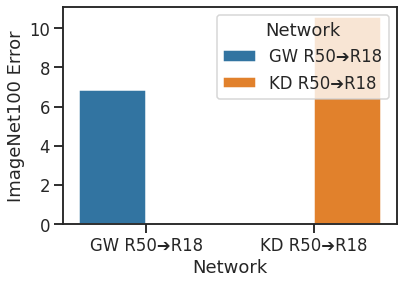

In [142]:
ax = sns.barplot(x="Network", y="ImageNet100 Error", hue="Network", data=df_plot)

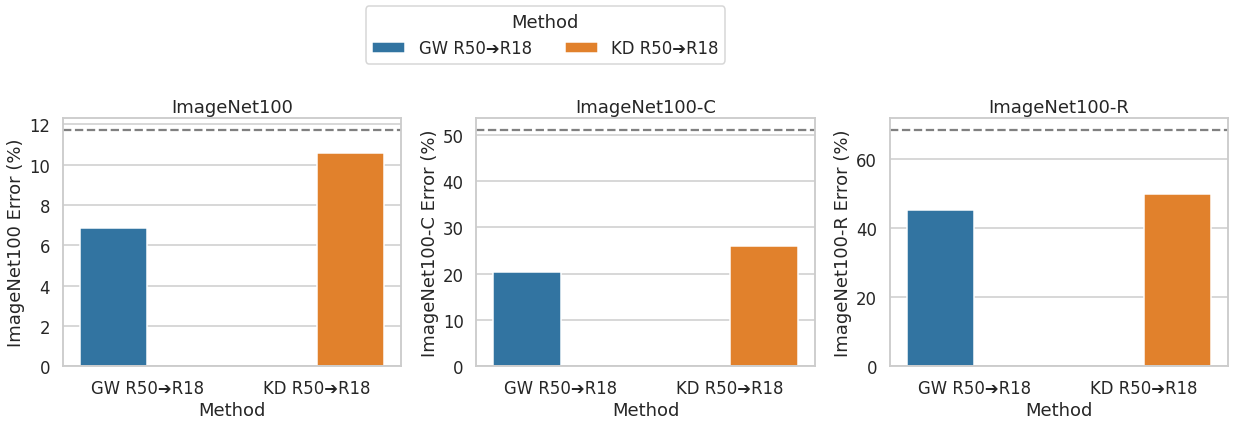

In [144]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17.5, 5))

for ax, error in zip(axes.flatten(), ["ImageNet100 Error", "ImageNet100-C Error", "ImageNet100-R Error"]):
    sns.barplot(data=df_plot, x="Network", y=error, hue="Network", ax=ax)
    ax.set_xlabel("Method")
    ax.set_ylabel(error + " (%)")
    ax.set_title(error.split(" ")[0])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend('', frameon=False)
    ax.axhline(df_baseline.query("Network == 'resnet18'")[error].item(), color="grey", ls="dashed")
fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=3, title='Method')
fig.tight_layout()
plt.savefig(f"figures/prune_vs_distill.pdf")

GW R50->R18


ValueError: Could not interpret input 'GW R50->R18'

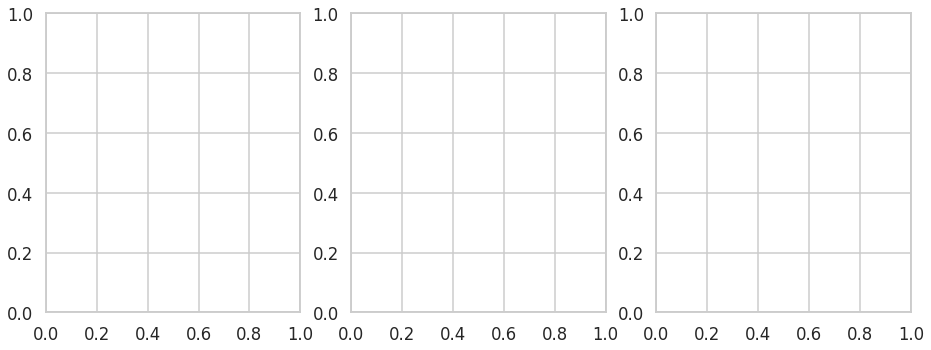

In [90]:
sns.set_style("whitegrid")
ERROR_LABELS = {"ImageNet100 Error": "ImageNet100", "ImageNet100-C Error": "ImageNet100-C", "ImageNet100-R Error": "ImageNet100-R"}

for network in df_plot["Network"].unique():
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5.5))
    df_part = df_plot.query(f"Network == '{network}'")    
    print(network)

    for (error, label), ax in zip(ERROR_LABELS.items(), axes.flatten()):
        sns.barplot(data=df_part, x=network, y=error , hue=network, ax=ax)

        # y, x = df_baseline.query(f"Network == '{network}' & Amda")[[error, "Model Size"]].to_numpy()[0]

        # ax.scatter(x, y, marker='x', color='black', label='Original Model', zorder=19)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend('', frameon=False)
        ax.set_title(label)
        ax.set_ylabel(error + " (%)" )
        ax.set_xlabel("Num. of Parameters (millions)")

    
    fig.legend(handles, labels, bbox_to_anchor=(0.3, 1.2), loc=2, borderaxespad=0., ncol=2)
    fig.tight_layout()

    plt.savefig(f"figures/pruning_vs_distill_{network}_amda.pdf", bbox_inches='tight')

In [21]:
df_prune_with = df_prune_with.query("not (Network == 'resnet18' & `Prune Method` == 'Random Filter' & Augmix & Epochs == 30)")
df_prune_with = df_prune_with.query("not `ImageNet100 Error`.isnull()")

In [22]:
df_prune = pd.concat([df_prune_with, df_prune_without])

In [23]:
# Add point zero.
entries = []
for (network, method), _ in df_prune.groupby(by=["Network", "Prune Method"]):
    entry = df_wider.query(f"Network == '{network}'").copy()
    entry[["Prune Method", "Prune Amount"]] = [method, 0.]
    entries.append(entry)

df_prune = df_prune.append(pd.concat(entries))

In [24]:
add_info(df_prune)
add_info(df_baseline)

,Amda,Augmix,DeepAugment,Epochs,ImageNet100 Error,ImageNet100-C Error,ImageNet100-R Error,Loss,Network,Path,Scaling,MACs,Model Size
270,False,False,False,90,11.739999,51.112539,68.669167,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,1.821716e+09,11.227812
90,True,True,True,30,13.080001,30.392003,55.988100,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,3.289753e+08,3.230412
90,True,True,True,30,12.980002,28.012806,53.563115,StandardLoss,resnet18,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,1.821716e+09,11.227812
90,True,True,True,30,13.160002,30.421329,56.350234,StandardLoss,mobilenet_v2,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,3.190844e+08,2.351972
270,False,False,False,90,11.379999,53.167999,69.374031,StandardLoss,mnasnet1_0,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,3.289753e+08,3.230412
270,False,False,False,90,11.760002,54.321861,68.901965,StandardLoss,mobilenet_v2,/work/dlclarge2/hoffmaja-pruneshift/experiment...,1,3.190844e+08,2.351972


In [25]:
# To get consistent coloring we need to sort by values.
df_prune = df_prune.sort_values(by="Prune Method")

In [26]:
df_prune = df_prune.query("not `ImageNet100 Error`.isnull()")

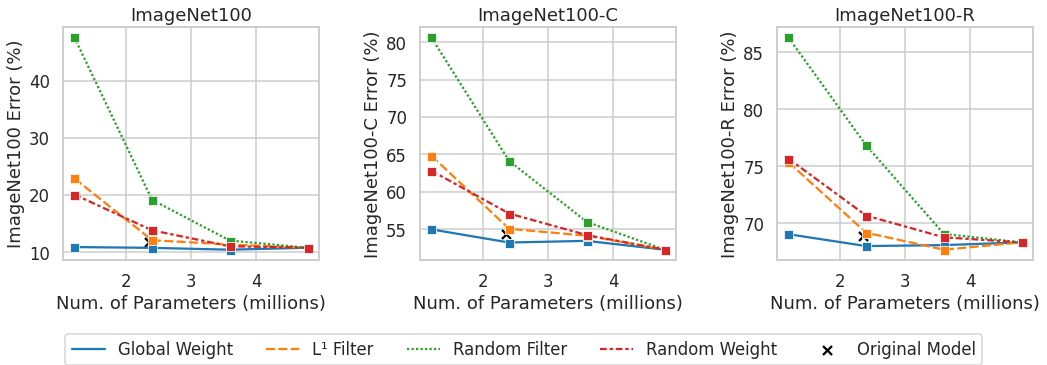

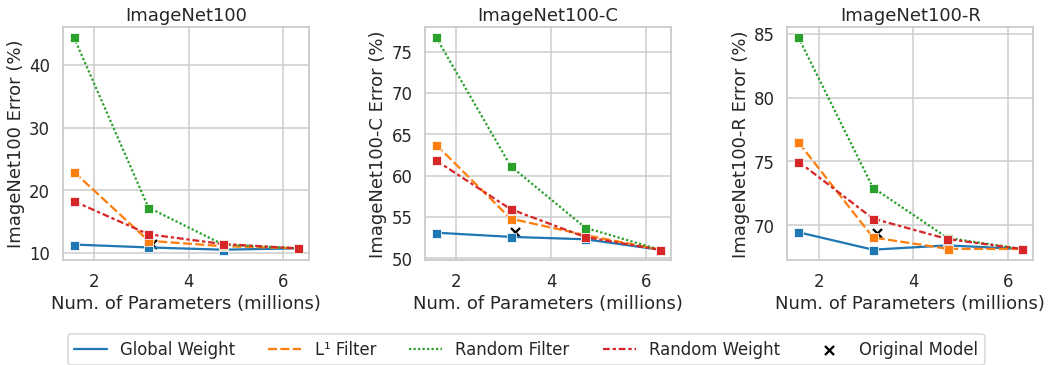

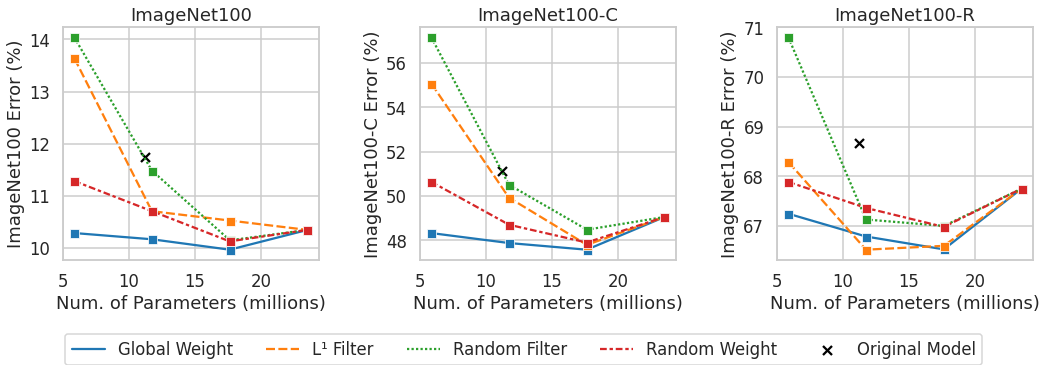

In [27]:
sns.set_style("whitegrid")
ERROR_LABELS = {"ImageNet100 Error": "ImageNet100", "ImageNet100-C Error": "ImageNet100-C", "ImageNet100-R Error": "ImageNet100-R"}

for network in df_prune["Network"].unique():
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5.5))
    df_part = df_prune.query(f"Network == '{network}' & not Amda")

    for (error, label), ax in zip(ERROR_LABELS.items(), axes.flatten()):
        sns.lineplot(data=df_part, x="Model Size", y=error , hue="Prune Method", ax=ax, marker="s", style="Prune Method")
        if network == "mnasnet":
            network = "mnasnet1_0"

        y, x = df_baseline.query(f"Network == '{network}' & not Amda")[[error, "Model Size"]].to_numpy()[0]

        ax.scatter(x, y, marker='x', color='black', label='Original Model', )
        plt.tight_layout()

        handles, labels = ax.get_legend_handles_labels()
        ax.legend('', frameon=False)
        ax.set_title(label)
        ax.set_ylabel(error + " (%)" )
        ax.set_xlabel("Num. of Parameters (millions)")

    fig.tight_layout(pad=2.5)
    fig.legend(handles, labels, loc="lower center", borderaxespad=0., ncol=5)
    plt.savefig(f"figures/pruning_suppl_plot_{network}.pdf")

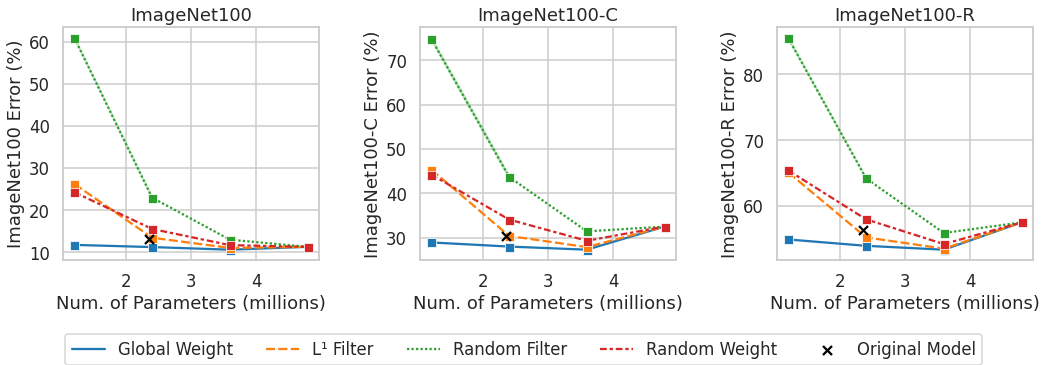

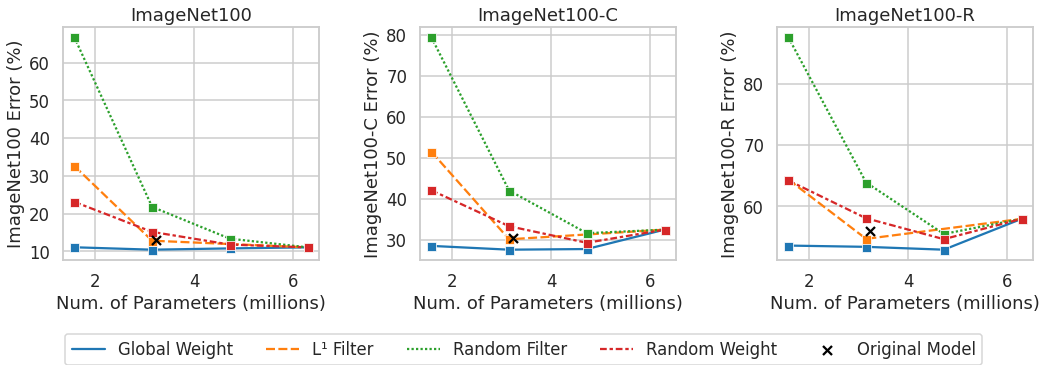

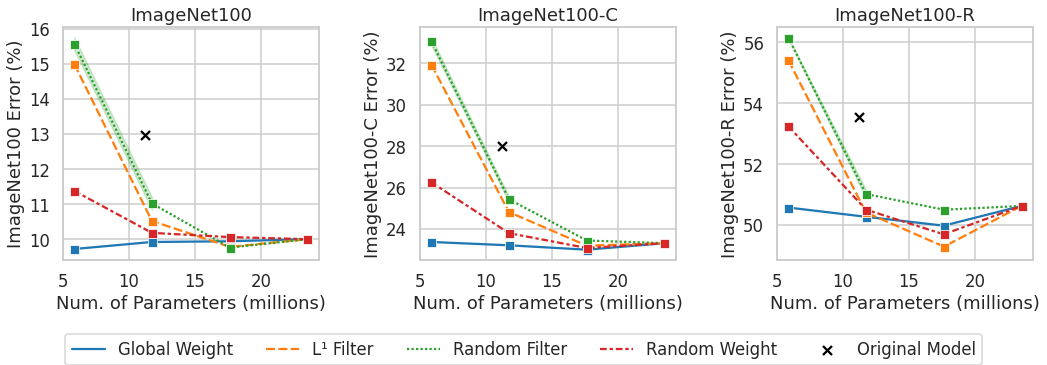

In [28]:
sns.set_style("whitegrid")
ERROR_LABELS = {"ImageNet100 Error": "ImageNet100", "ImageNet100-C Error": "ImageNet100-C", "ImageNet100-R Error": "ImageNet100-R"}

for network in df_prune["Network"].unique():
    fig, axes = plt.subplots(1, 3, figsize=(15.5, 5.5))
    df_part = df_prune.query(f"Network == '{network}' & Amda")

    for (error, label), ax in zip(ERROR_LABELS.items(), axes.flatten()):
        sns.lineplot(data=df_part, x="Model Size", y=error , hue="Prune Method", ax=ax, marker="s", style="Prune Method")
        if network == "mnasnet":
            network = "mnasnet1_0"

        y, x = df_baseline.query(f"Network == '{network}' & Amda")[[error, "Model Size"]].to_numpy()[0]

        ax.scatter(x, y, marker='x', color='black', label='Original Model', zorder=19)
        plt.tight_layout()

        handles, labels = ax.get_legend_handles_labels()
        ax.legend('', frameon=False)
        ax.set_title(label)
        ax.set_ylabel(error + " (%)" )
        ax.set_xlabel("Num. of Parameters (millions)")

    fig.tight_layout(pad=2.5)
    fig.legend(handles, labels, loc="lower center", borderaxespad=0., ncol=5)
    plt.savefig(f"figures/pruning_suppl_plot_{network}_amda.pdf")